<a href="https://colab.research.google.com/github/mishad01/Data-Science-Machine-Learning/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [39]:
data = pd.read_csv("/content/drive/MyDrive/ml_data/Bangladeshi University Students Mental Health.csv")
data

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


#Descriptive Analysis

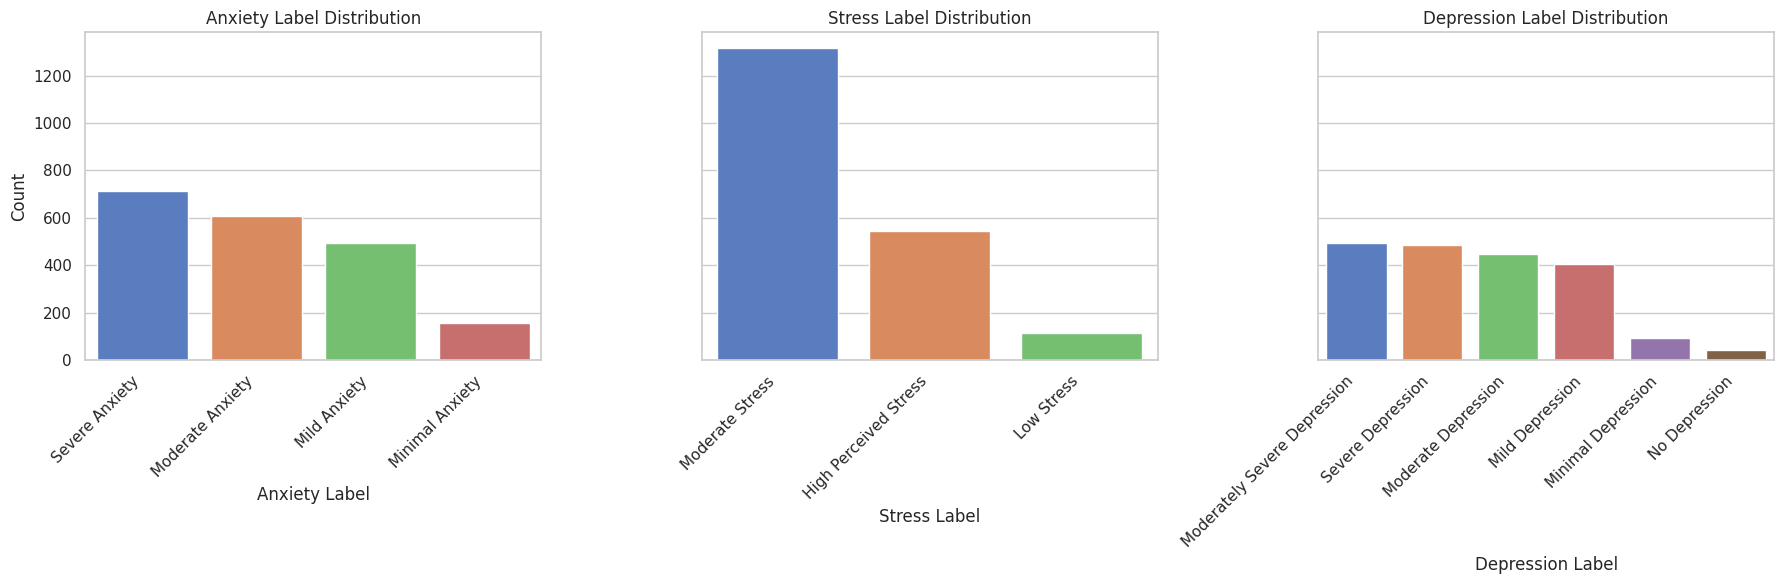

In [40]:


# Set visualization style
sns.set(style="whitegrid")

# 1. Mental Health Labels Distribution
label_columns = ['Anxiety Label', 'Stress Label', 'Depression Label']
label_distributions = {label: data[label].value_counts() for label in label_columns}

# Plot Mental Health Label Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, label in enumerate(label_columns):
    sns.barplot(
        x=label_distributions[label].index,
        y=label_distributions[label].values,
        ax=axes[idx],
        palette="muted"
    )
    axes[idx].set_title(f"{label} Distribution")
    axes[idx].set_ylabel("Count")
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [36]:
data.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

# Age and Gender Distribution

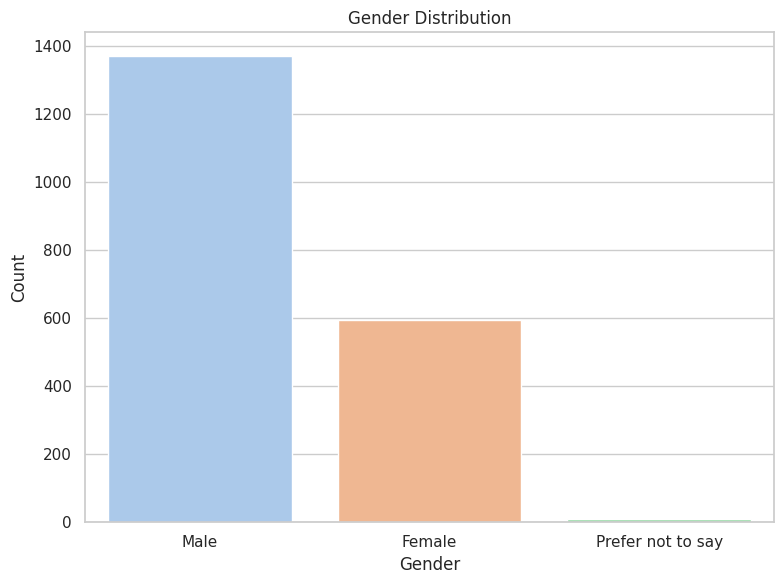

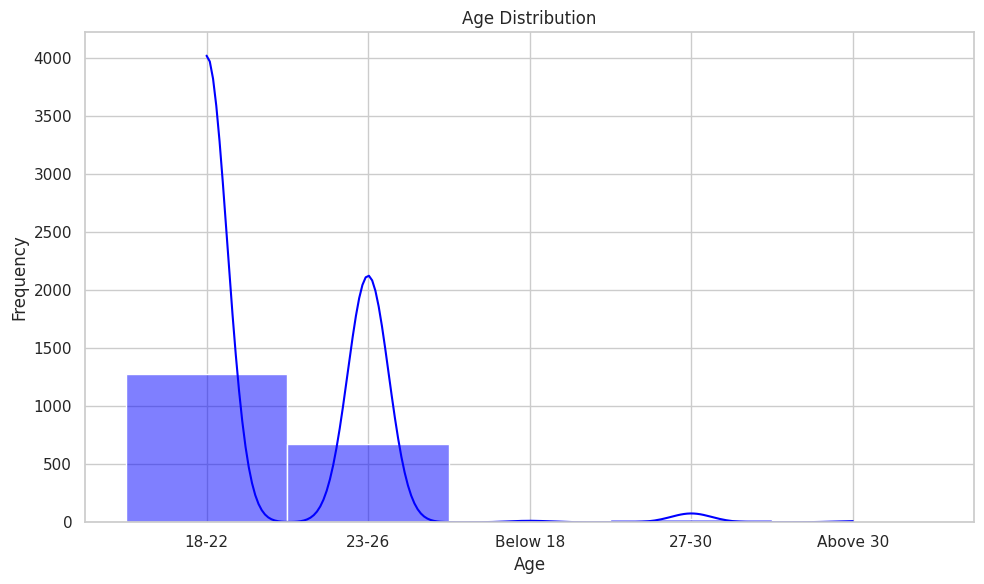

In [64]:
# Gender Distribution
gender_column = '2. Gender'
gender_distribution = data[gender_column].value_counts()

# Plot Gender Distribution
plt.figure(figsize=(8, 6))
sns.barplot(
    x=gender_distribution.index,
    y=gender_distribution.values,
    palette="pastel"
)
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.tight_layout()  # Adjust layout to add space
plt.show()
print()

# Age Distribution
age_column = '1. Age'

# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[age_column], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust layout to add space
plt.show()


#CGPA vs Mental Health Scores

In [66]:
# Transform CGPA ranges into approximate values
def approximate_cgpa(cgpa_range):
    if cgpa_range == "2.50 - 2.99":
        return 2.745
    elif cgpa_range == "3.80 - 4.00":
        return 3.90
    elif cgpa_range == "3.00 - 3.39":
        return 3.195
    elif cgpa_range == "3.40 - 3.79":
        return 3.595
    else:
        return None

data['Approximate CGPA'] = data['6. Current CGPA'].apply(approximate_cgpa)

# Display the updated dataset
#print(data[['6. Current CGPA', 'Approximate CGPA']].head())
#data['Approximate CGPA']
cgpa_column = data['Approximate CGPA'];



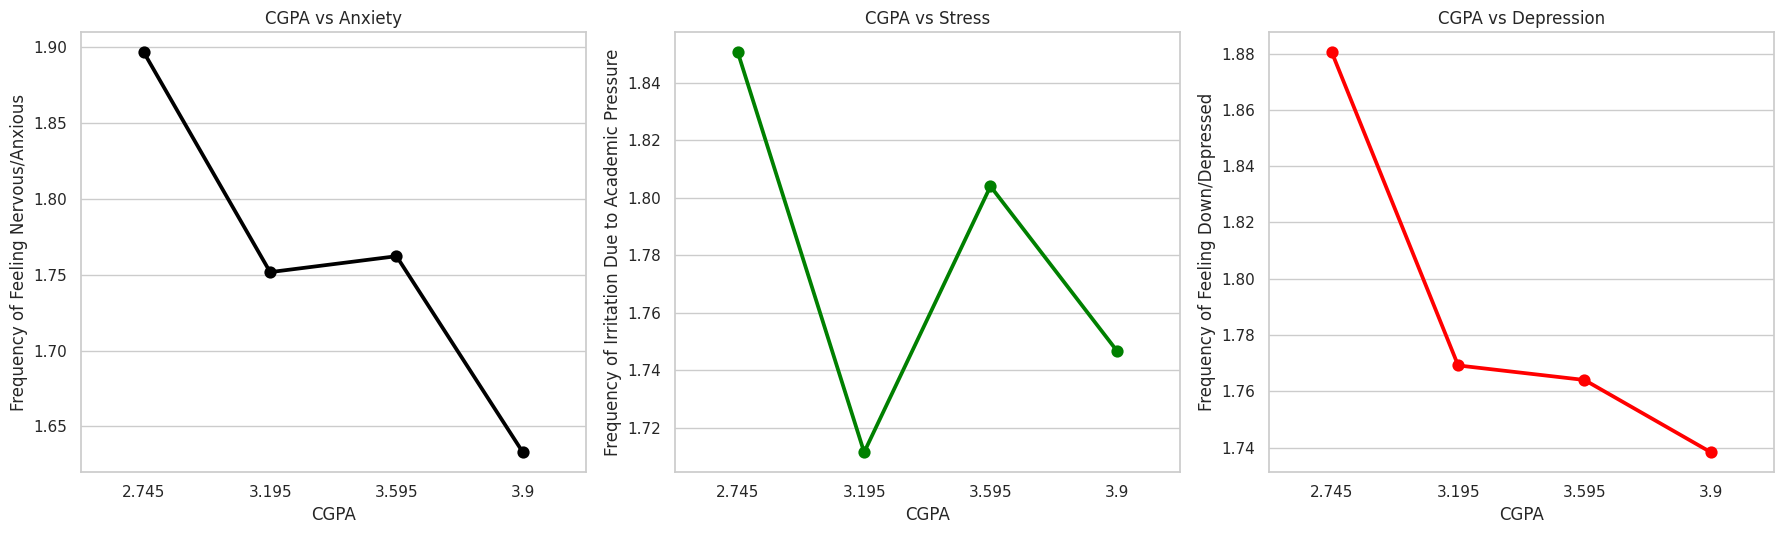

In [67]:
# Define columns
cgpa_column = 'Approximate CGPA'
anxiety_column = '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? '
stress_column = '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?'
depression_column = '2. In a semester, how often have you been feeling down, depressed or hopeless?'

# Plot scatter plots for CGPA vs. each mental health indicator
fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))

# CGPA vs Anxiety
#sns.violinplot(data=data, x=cgpa_column, y=anxiety_column, ax=axes[0], palette='rainbow')
sns.pointplot(data=data, x=cgpa_column, y=anxiety_column, ax=axes[0], color="black", ci=None, markers="o")
axes[0].set_title("CGPA vs Anxiety")
axes[0].set_xlabel("CGPA")
axes[0].set_ylabel("Frequency of Feeling Nervous/Anxious")

# CGPA vs Stress
sns.pointplot(data=data, x=cgpa_column, y=stress_column, ax=axes[1],  color="green", ci=None, markers="o")
axes[1].set_title("CGPA vs Stress")
axes[1].set_xlabel("CGPA")
axes[1].set_ylabel("Frequency of Irritation Due to Academic Pressure")

# CGPA vs Depression
sns.pointplot(data=data, x=cgpa_column, y=depression_column, ax=axes[2], color="red",ci=None, markers="o")
axes[2].set_title("CGPA vs Depression")
axes[2].set_xlabel("CGPA")
axes[2].set_ylabel("Frequency of Feeling Down/Depressed")

plt.tight_layout()
plt.show()

#Correlation Heatmap

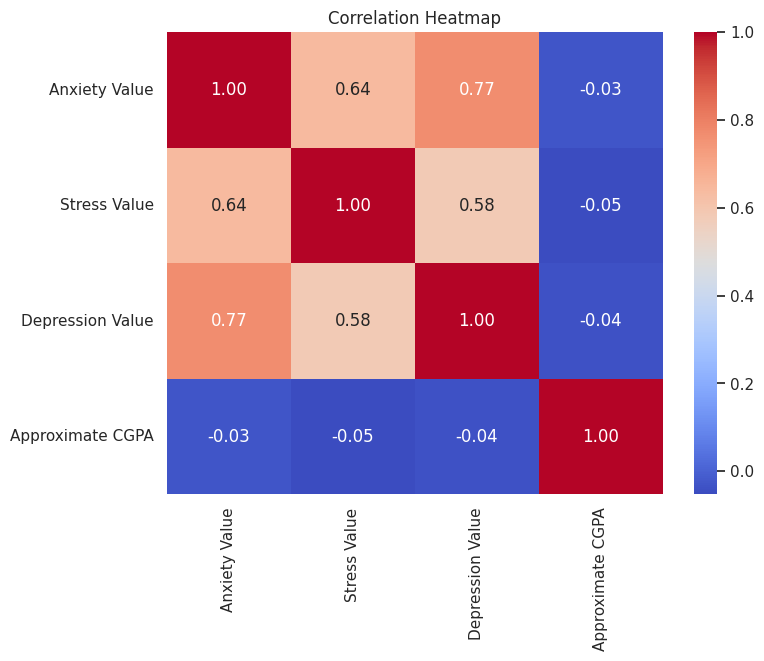

In [68]:
# Ensure correct column names
correlation_data = data[['Anxiety Value', 'Stress Value', 'Depression Value', 'Approximate CGPA']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#Clustering

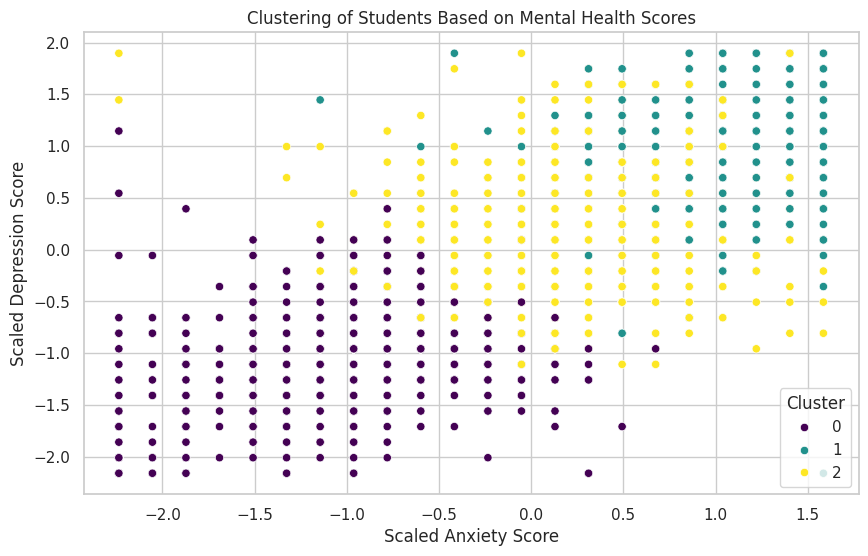

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = data[['Anxiety Value', 'Stress Value', 'Depression Value']]

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],  # Scaled Anxiety Score
    y=scaled_features[:, 2],  # Scaled Depression Score
    hue=data['Cluster'],
    palette='viridis'
)
plt.title("Clustering of Students Based on Mental Health Scores")
plt.xlabel("Scaled Anxiety Score")
plt.ylabel("Scaled Depression Score")
plt.legend(title="Cluster")
plt.show()


#Comparison of Academic vs Personal Contexts
Ensure 'Context (Academic/Personal)' column exists with values like "Academic" and "Personal."

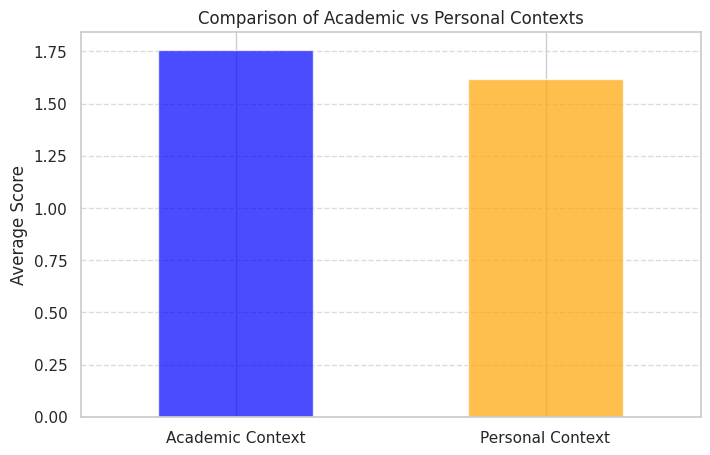

In [70]:
# Identify Academic and Personal columns
academic_columns = [
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
    '5. In a semester, how often have you worried too much about academic affairs? ',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?',
]

personal_columns = [
    '1. In a semester, how often have you had little interest or pleasure in doing things?',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ',
    '4. In a semester, how often have you been feeling tired or having little energy? ',
    '5. In a semester, how often have you had poor appetite or overeating? ',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ',
]

# Calculate mean scores for Academic and Personal contexts
data['Academic Context'] = data[academic_columns].mean(axis=1)
data['Personal Context'] = data[personal_columns].mean(axis=1)
import matplotlib.pyplot as plt

# Calculate mean values for both contexts
context_means = data[['Academic Context', 'Personal Context']].mean()

# Plot comparison
plt.figure(figsize=(8, 5))
context_means.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)

# Add labels and title
plt.title('Comparison of Academic vs Personal Contexts')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Trend Analysis


<Figure size 1200x600 with 0 Axes>

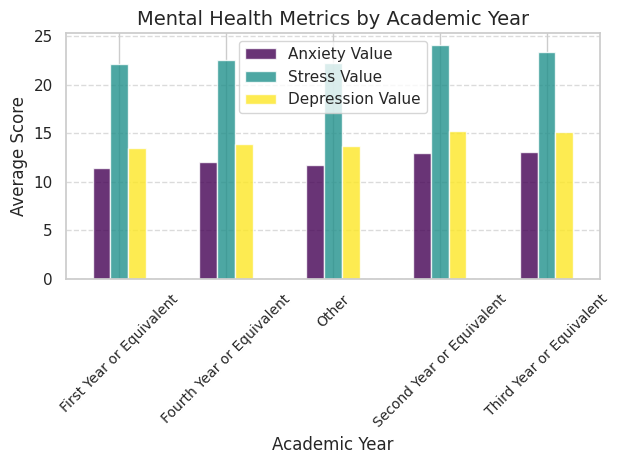

In [71]:
import matplotlib.pyplot as plt


# Second bar plot: Mental Health Metrics by Academic Year
plt.figure(figsize=(12, 6))
academic_trends = data.groupby('5. Academic Year')[numeric_cols].mean()
academic_trends.plot(kind='bar', colormap='viridis', alpha=0.8)

plt.title('Mental Health Metrics by Academic Year', fontsize=14)
plt.ylabel('Average Score', fontsize=12)
plt.xlabel('Academic Year', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#7. Predictive Insights
Using Linear Regression to Predict Anxiety Levels
The predictive model is straightforward and effective for regression.

Mean Squared Error: 10.299165656026423
R-squared Value: 0.626975983289932


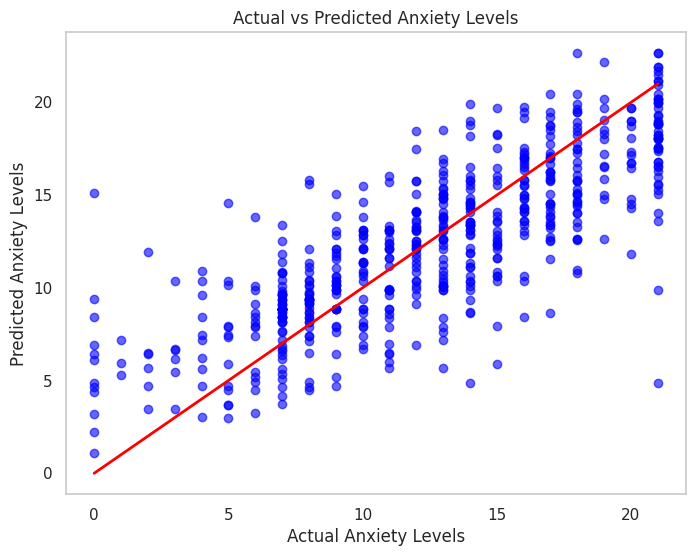

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (Depression, Stress) and target (Anxiety)
X = data[['Depression Value', 'Stress Value']]
y = data['Anxiety Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Anxiety Levels")
plt.xlabel("Actual Anxiety Levels")
plt.ylabel("Predicted Anxiety Levels")
plt.grid()
plt.show()


**8**. Highlighting Critical Cases
Defining and Visualizing Critical Cases
Set thresholds for identifying severe cases. Adjust values (>= 4) as per data range.

Number of Critical Cases: 1973


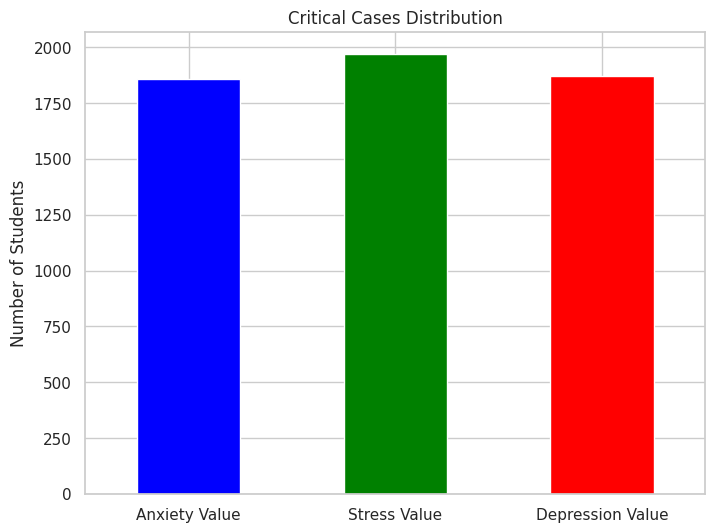

In [73]:
# Define thresholds for critical cases
severe_anxiety_threshold = 4  # Example threshold for severe anxiety
high_stress_threshold = 4     # Example threshold for high stress
severe_depression_threshold = 4  # Example threshold for severe depression

# Filter critical cases
critical_cases = data[
    (data['Anxiety Value'] >= severe_anxiety_threshold) |
    (data['Stress Value'] >= high_stress_threshold) |
    (data['Depression Value'] >= severe_depression_threshold)
]

print("Number of Critical Cases:", critical_cases.shape[0])

# Display critical cases (example: top 10)
critical_cases.head(10)

# Save critical cases to a file for further analysis
critical_cases.to_csv("Critical_Cases.csv", index=False)

# Visualize critical cases distribution
plt.figure(figsize=(8, 6))
critical_count = critical_cases[['Anxiety Value', 'Stress Value', 'Depression Value']].apply(
    lambda x: (x >= 4).sum(), axis=0
)
critical_count.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title("Critical Cases Distribution")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()
